# Introduction
In this code I tried to show you classification types with using sklearn.

1. [Entreing and Normalizing Data](#1)
1. [Train Test Split](#3)
1. [Classification Types](#2)
    * [Logistic Regression Classification](#4)
    * [KNN](#5)
    * [SVM](#6)
    * [Naive Bayes](#7)
    * [Decision Tree Classification](#8)
    * [Random Forest Classification](#9)
    * [Confusion Matrix](#10)
1. [Conclusion](#11)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv),
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/lower-back-pain-symptoms-datasetlabelled/Dataset_spine.csv


<a id="1"></a><br>
# Entering and Normalizing Data

In [2]:
data=pd.read_csv("/kaggle/input/lower-back-pain-symptoms-datasetlabelled/Dataset_spine.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Class_att                   310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [5]:
data.Class_att=[1 if each =="Abnormal" else 0 for each in data.Class_att]

In [6]:
y=data.Class_att.values
x_data=data.drop(["Class_att"],axis=1)

x=(x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

<a id="3"></a><br>
# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<a id="2"></a><br>
# Classification Types

<a id="4"></a><br>
## Logistic Regression Classification

In [8]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

print("Logistic Regression score:",lr.score(x_test,y_test))

Logistic Regression score: 0.7956989247311828


<a id="5"></a><br>
## KNN

3 nn score: 0.6559139784946236


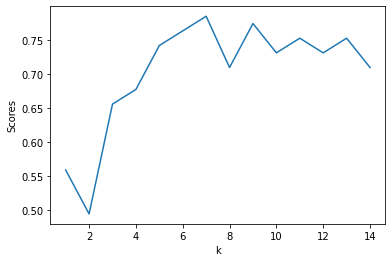

according to the graph the max score value is at k = 7 and score is : 0.7849462365591398


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

print("{} nn score: {}".format(3,knn.score(x_test,y_test)))

score_list=[]

for each in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k")
plt.ylabel("Scores")
plt.show()

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

print("according to the graph the max score value is at k = 7 and score is :",knn.score(x_test,y_test))

<a id="6"></a><br>
## SVM

In [10]:
from sklearn.svm import SVC

svm=SVC(random_state=42)
svm.fit(x_train,y_train)

print("svm score:",svm.score(x_test,y_test))

svm score: 0.7419354838709677


<a id="7"></a><br>
## Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

print("nb score:",nb.score(x_test,y_test))

nb score: 0.7956989247311828


<a id="8"></a><br>
## Decision Tree Classification

In [12]:
from sklearn.tree import DecisionTreeClassifier

df=DecisionTreeClassifier(random_state=42)
df.fit(x_train,y_train)

print("Desicion Tree Classification score:",df.score(x_test,y_test))

Desicion Tree Classification score: 0.7849462365591398


<a id="9"></a><br>
## Random Forest Classification

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

print("Random Forest Classification score:",rf.score(x_test,y_test))

Random Forest Classification score: 0.8064516129032258


<a id="10"></a><br>
## Confusion Matrix

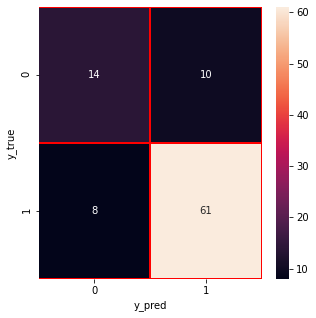

In [14]:
y_pred=rf.predict(x_test)
y_true=y_test

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<a id="11"></a><br>
# Conclusion

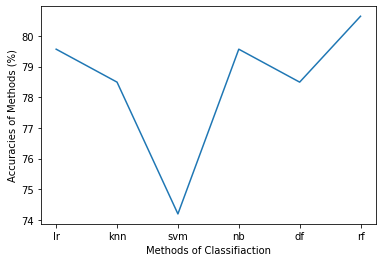

In [15]:
class_method=[lr,knn,svm,nb,df,rf]
method_acc=[]
method_name=["lr","knn","svm","nb","df","rf"]

for each in class_method:
    method_acc.append(each.score(x_test,y_test)*100)
    
plt.plot(method_name,method_acc)
plt.xlabel("Methods of Classifiaction")
plt.ylabel("Accuracies of Methods (%)")
plt.show()

In conclusion, we can say that random forest classification is has the greatest accuracy ans svm has the least accuracy. 
If you want to get more information about classification you can visit: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners